In [1]:
import sys
sys.path.append("../")
import numpy as np
import matplotlib.pyplot as plt
from GraphDataset import GraphDataset, MultiGraphDataset
from creditlearning import CreditLearner
import matplotlib


matplotlib.font_manager._rebuild()
plt.rcParams.update({'font.size': 22, 'font.family': 'Arial',
                    'mathtext.fontset': 'custom',
                    'mathtext.rm': 'Arial',
                    'mathtext.cal': 'Arial:italic',
                    'mathtext.it': 'Arial:italic',
                    'mathtext.bf': 'Arial:bold'})

np.random.seed(50)
dt = 0.01

def dist(x,i):
    if i%3==0:
        return np.array([0.05,0.75,0.2])
    elif i%3==1:
        return np.array([0.2,0.05,0.75])
    else:
        return np.array([0.75,0.2,0.05])

mean_scale = 10
var_scale = 2
min_cutoff = 0.0001

maxNumProcesses = 2
numNodesList = [3 for i in range(maxNumProcesses)]
pList = [1 for i in range(maxNumProcesses)]
scaleList = [(mean_scale,var_scale) for i in range(maxNumProcesses)]
#scaleList = [(10,2),(5,1)]

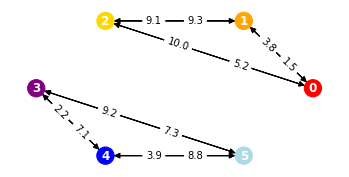

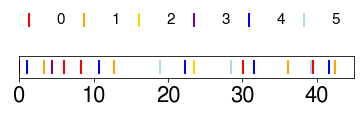

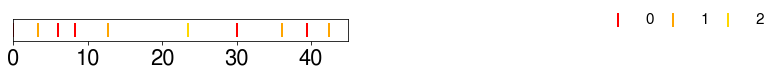

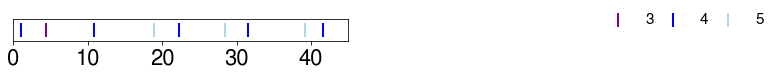

In [19]:


np.random.seed(50)
multigraph1 = MultiGraphDataset(numNodesList=numNodesList,
                                pList=pList,
                                scaleList=scaleList,
                                uniformTime=0,
                                dist=dist,
                                uniformTransitions=False,
                                dt=dt,
                                colourList = [['red','orange','gold'],['purple','blue','lightblue']]
                               )

multigraph1.plotComposedGraph(figsize=(6,3),withProbs=False,
                              savefig=True,figname='transition_times.png')

figsize = (6,0.4)
#legend_loc1 = (1.3,-1.5)
#legend_loc2 = (1.3,-0.5)
legend_loc1 = (0.47,1.7)
legend_loc2 = (2,0)

numEventsPerProcess = [30 for i in range(maxNumProcesses)]
min_cutoff = 0.0001
offsets = [i for i in range(maxNumProcesses)]
multigraph1.generateEvents(numEventsPerProcess,offsets=[0,1],cutoff=min_cutoff,minTime=True,minSeparation=0.0001)


# fig = multigraph1.plotEvents(figsize=(15,0.4),linewidths=2,legend_anchor=(1.01, 1.3),edgecolor='white',xlim=(0,45),
#                        savefig=0,figname='events_1_and_2.png',)



fig = multigraph1.plotEvents(figsize=figsize,linewidths=2,legend_loc='lower center',
                  legend_anchor=legend_loc1,ncol=6,fancybox=1,xlim=(0,45),edgecolor='white',
                       savefig=False,figname='events_1_and_2.png',legend_fontsize='x-small',columnspacing=0.25)



multigraph1.graphs[0].colours = ['red','orange','gold']
multigraph1.graphs[0].labels = [0,1,2]
# multigraph1.graphs[0].plotEvents(figsize=(15,0.4),linewidths=2,legend_anchor=(1.01, 1.05),edgecolor='white',xlim=(0,45),
#                                  savefig=True,figname='events_1.png',)

multigraph1.graphs[0].plotEvents(figsize=figsize,linewidths=2,legend_loc='lower center',
                  legend_anchor=legend_loc2,ncol=3,fancybox=1,xlim=(0,45),edgecolor='white',
                                 savefig=False,figname='events_1.png',legend_fontsize='x-small',columnspacing=0.25)


multigraph1.graphs[1].colours = ['purple','blue','lightblue']
multigraph1.graphs[1].labels = [3,4,5]
multigraph1.graphs[1].events = multigraph1.graphs[1].events-3
multigraph1.graphs[1].times = multigraph1.graphs[1].times+offsets[1]
# multigraph1.graphs[1].plotEvents(figsize=(15,0.4),linewidths=2,legend_anchor=(1.01, 1.05),edgecolor='white',xlim=(0,45),
#                                  savefig=True,figname='events_2.png',)

multigraph1.graphs[1].plotEvents(figsize=figsize,linewidths=2,legend_loc='lower center',
                  legend_anchor=legend_loc2,ncol=3,fancybox=1,xlim=(0,45),edgecolor='white',
                                 savefig=True,figname='events_2.png',legend_fontsize='x-small',columnspacing=0.25)

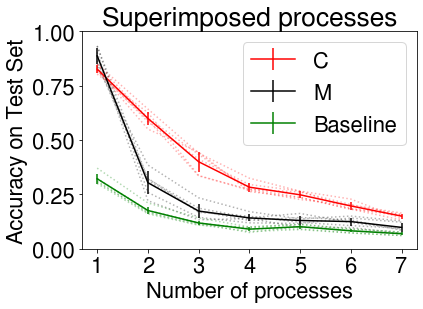

In [23]:
allAccuracies = np.load('./allAccuracies.npy')
allAccuraciesM = np.load('./allAccuraciesM.npy')
allAccuraciesBaseline = np.load('./allAccuraciesBaseline.npy')


maxNumProcesses = allAccuracies.shape[1]
#plt.figure(figsize=(1.4*6.4,1.4*4.8))
plt.figure()
matplotlib.font_manager._rebuild()
plt.rcParams.update({'font.size': 22, 'font.family': 'FreeSans',
                    'mathtext.fontset': 'custom',
                    'mathtext.rm': 'FreeSans',
                    'mathtext.cal': 'FreeSans:oblique',
                    'mathtext.it': 'FreeSans:oblique',
                    'mathtext.bf': 'FreeSans:bold'})

plt.title("Superimposed processes")
plt.ylim(0,1)
plt.xticks(np.arange(1,maxNumProcesses+1))
plt.xlabel("Number of processes")
plt.ylabel("Accuracy on Test Set")


for i in range(allAccuracies.shape[0]):
    plt.plot(np.arange(1,maxNumProcesses+1),allAccuracies[i],ls='dotted',color='red',alpha=0.3)
    plt.plot(np.arange(1,maxNumProcesses+1),allAccuraciesM[i],ls='dotted',color='black',alpha=0.3)
    plt.plot(np.arange(1,maxNumProcesses+1),allAccuraciesBaseline[i],ls='dotted',color='green',alpha=0.3)


plt.errorbar(np.arange(1,maxNumProcesses+1),np.mean(allAccuracies,axis=0),np.sqrt(np.var(allAccuracies,axis=0)),label="C",color='red')
plt.errorbar(np.arange(1,maxNumProcesses+1),np.mean(allAccuraciesM,axis=0),np.sqrt(np.var(allAccuraciesM,axis=0)),label="M",color='black')
plt.errorbar(np.arange(1,maxNumProcesses+1),np.mean(allAccuraciesBaseline,axis=0),np.sqrt(np.var(allAccuraciesBaseline,axis=0)),label="Baseline",color='green')


plt.legend()

plt.savefig('./multiple_processes_2.png',bbox_inches='tight')
plt.show()